In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [79]:
data = pd.read_csv("./data.csv", na_values= [-99999.0])
data.head()

,Year,Entity,Code,Sales of cigarettes per adult per day,age-standardized_death_rate_per_100k_male,age-standardized_death_rate_per_100k_female
0,1900,United States,USA,0.1,NaN,NaN
1,1901,United States,USA,0.1,NaN,NaN
2,1902,United States,USA,0.1,NaN,NaN
3,1903,United States,USA,0.1,NaN,NaN
4,1904,United States,USA,0.2,NaN,NaN


In [80]:
year = data["Year"].to_numpy()
sales = data["Sales of cigarettes per adult per day"].to_numpy()
rate_male = data["age-standardized_death_rate_per_100k_male"].to_numpy()
rate_female = data["age-standardized_death_rate_per_100k_female"].to_numpy()

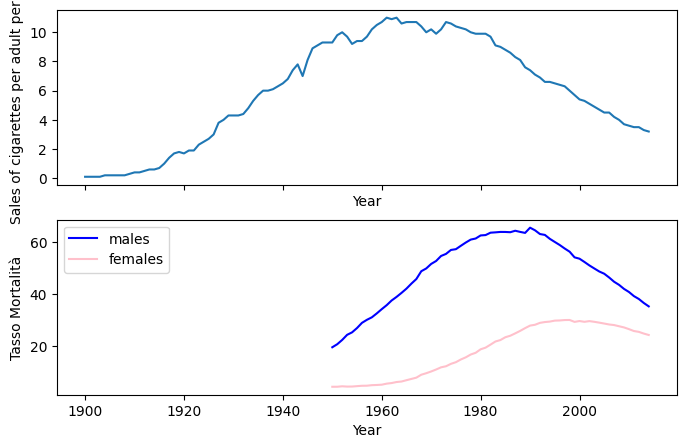

In [81]:
fig, ax = plt.subplots(nrows= 2,figsize = (8, 5), sharex= True)
ax[0].plot(year, sales)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Sales of cigarettes per adult per day")
ax[1].plot(year, rate_male, color = "blue", label  = "males")
ax[1].plot(year, rate_female, color = "pink", label = "females")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Tasso Mortalità")
ax[1].legend()
plt.show()

In [82]:
lag = 20
sales_lag = np.roll(sales, lag)
data_lag = pd.DataFrame({"Sales_lagged": sales_lag, "Rate_male": rate_male})
data_lag.dropna(inplace= True)
x = data_lag["Sales_lagged"].to_numpy()
y = data_lag["Rate_male"].to_numpy()

In [83]:
model = LinearRegression(fit_intercept= True)
model.fit(x.reshape(-1,1),y)

LinearRegression()

In [84]:
r2 = model.score(x.reshape(-1,1),y)
print(f"{lag} -> {r2}")

20 -> 0.9523599621979915
